In [2]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_elem = 3
mesh = IntervalMesh(n_elem, 0, 1)

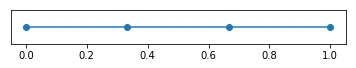

In [4]:
plot(mesh)

In [4]:
U = FunctionSpace(mesh, "CG", 1)

In [5]:
u_D = Constant(0.0)
boundary = CompiledSubDomain("on_boundary")
bc = DirichletBC(U, u_D, boundary)

In [6]:
u = TrialFunction(U)
v = TestFunction(U)
a = inner(grad(u), grad(v)) * dx

In [7]:
f_expr = Expression("pi*pi*sin(pi*x[0])", pi=np.pi, degree=2)

In [9]:
L = f_expr * v * dx

In [10]:
u_sol = Function(U)
solve(a == L, u_sol, bc)

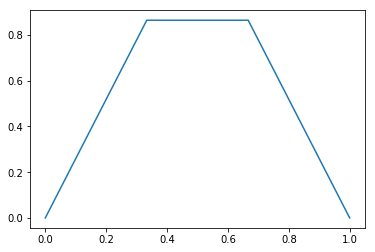

In [11]:
plot(u_sol)

In [15]:
u_sol(0.5)

0.8648790643807451

In [17]:
u_sol

Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', interval, 1), dim=1), 0), FiniteElement('Lagrange', interval, 1)), 8)

In [18]:
def u_exact(x):
    return np.sin(np.pi * x)

In [20]:
points = np.linspace(0, 1, 100)

# Evaluate the exact solution at the mesh points
u_exact_values = np.array([u_exact(x) for x in points])

# Evaluate the numerical solution at the mesh points
u_numerical_values = np.array([u_sol(x) for x in points])

# Compute the error
error = u_exact_values - u_numerical_values

print("L2 error:", np.linalg.norm(error))

L2 error: 0.6951127497810745


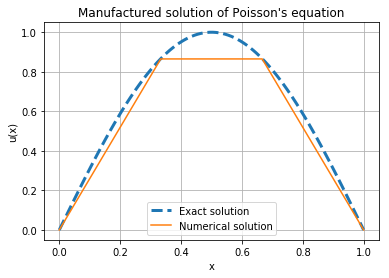

In [21]:
plt.figure()
plt.plot(points, u_exact_values, "--", label='Exact solution', linewidth=3)
plt.plot(points, u_numerical_values, label='Numerical solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Manufactured solution of Poisson\'s equation')
plt.grid()
plt.show()

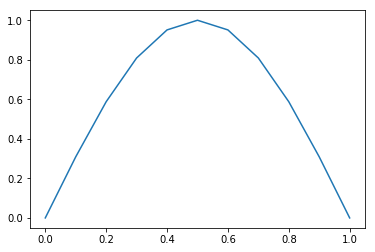

In [6]:
# solution of pde Poisson's - uh


mesh = IntervalMesh(10, 0, 1)
U = FunctionSpace(mesh, 'CG', 1)

ud = Constant(0.0)
boundary = CompiledSubDomain('on_boundary')
bc = DirichletBC(U, ud, boundary)
u, v = TrialFunction(U), TestFunction(U)
f_expr = Expression('pi*pi*sin(pi*x[0])', pi = np.pi, degree = 2)

a = inner(grad(u), grad(v)) * dx
L = f_expr * v * dx

uh = Function(U)
solve(a==L, uh, bc)
plot(uh)